## Introdução

Este projeto tem como objetivo analisar o conjunto de dados 'World Population', que traz dados sobre a população mundial como o número de habitantes em alguns anos, densidade populacional e o continente em que o mesmo está localizado. Além da análise dos dados, é de interesse treinar e aprimorar a utilização de gráficos em Python.  

O dataset foi retirado do site [Kaggle](https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset), e tem como base um censo feito pelo [Departamento de Censo dos Estados Unidos](https://www.census.gov/) em 2019 e faz algumas estimativas para os anos seguintes baseados nos dados da ONU. 

Algumas perguntas que pretendem ser respondidas neste projeto:

- Quais os 10 países mais populosos do mundo? Houveram mudanças nessas posições nos últimos anos?
- Como é a tendência de crescimento populacional por continente?
- Como é dada a relação da área do território e população? 
- O fenômeno de diminuição da população: identificar os países em que acontece esse fato e tentar entender causas e consequências através de outras referências. 



## Importação de Bibliotecas e Importação de Dados

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pop_df = pd.read_csv('world_population.csv')
pop_df.head()
pop_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

Temos então 16 variáveis e 234 países e nenhuma linha com dados faltantes. 

## Vamos observar os 10 países mais populosos e a distribuição de população por continente.

AxesSubplot(0.125,0.11;0.775x0.77)


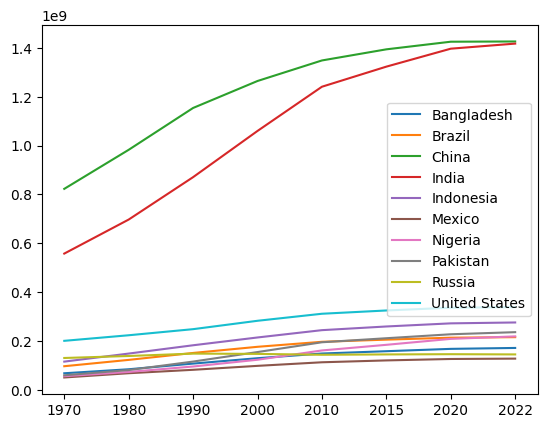

In [2]:
# Lista dos 10 países mais populosos do mundo

paises = pop_df.sort_values('Rank').head(10)['Country/Territory']

count_df = pop_df.iloc[:, 5:13]
count_df['Country'] = pop_df['Country/Territory']

# Como desejamos ver o comportamento sobre o tempo, é intuitivo que o tempo "avance" da esquerda para direita

count_df = count_df.iloc[:, ::-1]
count_df = count_df.loc[count_df['Country'].isin(list(paises))]

df = count_df
df = df.set_index('Country').T.to_dict('list')

df = pd.DataFrame(df, index=['1970', '1980', '1990', '2000', '2010', '2015','2020', '2022'])


print(df.plot.line())



Algumas observações:

1. A escala do gráfico está incorreta. Como os espaços de tempo não são iguais, poderiam ser criados tempos intermediários ou então trabalhar sem os anos de 2015 e 2022.
2. É possível perceber que China e Índia além de terem as maiores populações, também tem taxas de crescimento maiores que os demais países observados no gráfico.
3. Apenas Índia, China, Estados Unidos e Indonésia são claramente distinguíveis no gráfico. Fica o desafio de fazer um gráfico interativo para observar melhor o comportamento dos demais países.

C:\Users\mathe\AppData\Local\Temp\ipykernel_15628\301168433.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  popcont = pop_df.groupby('Continent').sum() # Agrupando por Continente


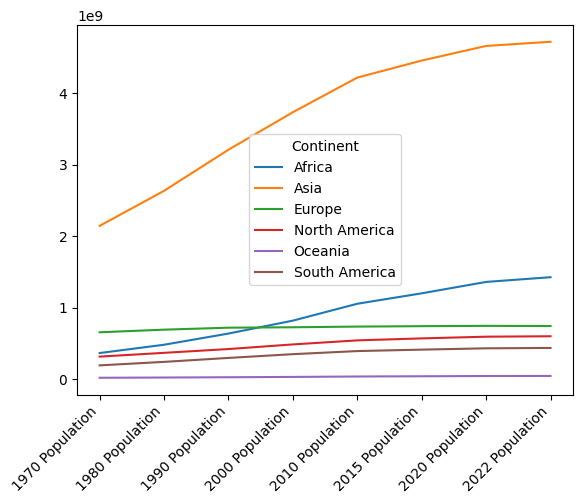

In [3]:
popcont = pop_df.groupby('Continent').sum() # Agrupando por Continente
popcont = popcont.iloc[:, 1:9]              # Escolhendo as colunas desejadas
popcont = popcont.iloc[:, ::-1]             # Invertendo a ordem para ficar coerente com o tempo

_ = popcont.T.plot.line()
_ = plt.xticks(rotation=45, ha='right')         # Ajeitando a legenda


Assim como o gráfico anterior, temos o mesmo problema de escala. Mas é possível perceber que África e Ásia cresceram mais populacionalmente que os demais continentes nas últimas décadas. 

## População vs Área do Território

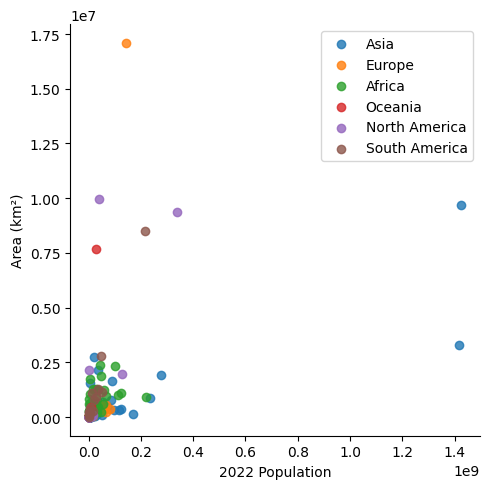

In [18]:
sns.lmplot(x = '2022 Population', y = 'Area (km²)', data = pop_df, hue='Continent', legend = False, fit_reg=False)

plt.legend(loc = 'upper right')

plt.show()

Aqui poderíamos transformar as variáveis para ficarem em uma escala que fosse possível observar melhor o comportamento da massa dos pontos (localizada no canto inferior esquerdo). Mas como o objetivo do projeto é exercitar visualização e curiosidade, vamos tentar fazer um gráfico interativo para conhecer esses pontos discrepantes. 

In [20]:
import plotly.express as px 

fig = px.scatter(pop_df, x='2022 Population', y='Area (km²)', color='Continent', hover_data=['Country/Territory'])

fig.show()


Agora é possível observar que os pontos à direita são os dois países mais populosos (China e Índia), como esperado. Mas os mais interessante são os pontos na parte de cima do mapa, ou seja, que tem uma grande área, mas uma densidade relativamente não tão alta. É interessante pesquisar ou imaginar os motivos desses comportamentos. Por exemplo, a Rússia, que tem o maior território com mais de 17 milhões de km², é um país muito frio ao ponto de tornar vários pontos de difícil sobrevivência. 

## Países com decrescimento da população.